In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import os

In [52]:
print(tf.__version__)

2.17.0


setting the path in the variable

In [53]:
train_dir="D:\\project\\brain tumor\\archive (1)\\Training"
valid_dir="D:\\project\\brain tumor\\archive (1)\\Testing"

categories = ["glioma", "meningioma", "notumor", "pituitary"]

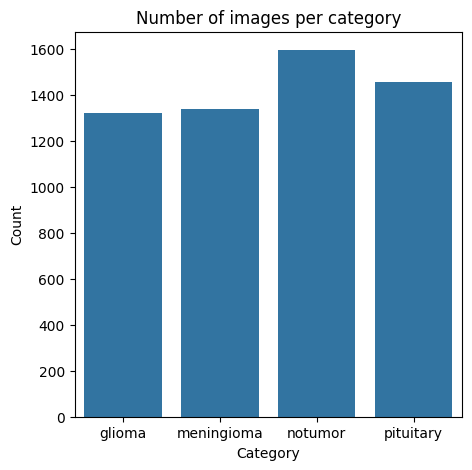

In [54]:
train_data=[]
for a in categories:
    path=os.path.join(train_dir,a)
    image=os.listdir(path)
    count=len(image)
    train_data.append(pd.DataFrame({"Image": image, "Category": [a] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

plt.figure(figsize=(5,5))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Number of images per category")
plt.show()


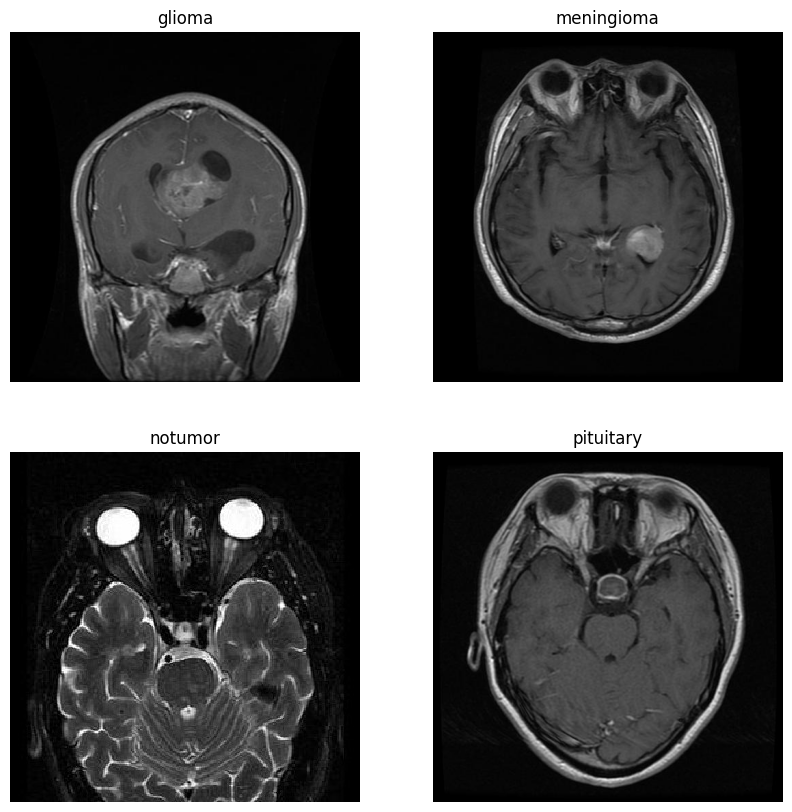

In [55]:
plt.figure(figsize=(10,10))
for i,category in enumerate(categories):
    fpath=os.path.join(train_dir,category)
    ipath=os.path.join(fpath,os.listdir(fpath)[1])
    img=plt.imread(ipath)
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.show()


In [56]:
img_size=(150,150)
batch_size=32
epochs=22

In [57]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [78]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    
    Dense(len(categories), activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [79]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Epoch 1/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 73s 376ms/step - accuracy: 0.5742 - loss: 1.6206 - val_accuracy: 0.2102 - val_loss: 7.3486
Epoch 2/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8125 - loss: 0.4931 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/22


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


178/178 ━━━━━━━━━━━━━━━━━━━━ 66s 361ms/step - accuracy: 0.6535 - loss: 0.9106 - val_accuracy: 0.2516 - val_loss: 9.7028
Epoch 4/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.5312 - loss: 1.1560 - val_accuracy: 1.0000 - val_loss: 2.6918e-08
Epoch 5/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 65s 360ms/step - accuracy: 0.6985 - loss: 0.7952 - val_accuracy: 0.4625 - val_loss: 3.9992
Epoch 6/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - accuracy: 0.7188 - loss: 0.8078 - val_accuracy: 1.0000 - val_loss: 1.9213e-04
Epoch 7/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 66s 364ms/step - accuracy: 0.7470 - loss: 0.6770 - val_accuracy: 0.5836 - val_loss: 1.2771
Epoch 8/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.8125 - loss: 0.5508 - val_accuracy: 0.2258 - val_loss: 2.9945
Epoch 9/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 66s 365ms/step - accuracy: 0.7517 - loss: 0.6878 - val_accuracy: 0.5555 - val_loss: 1.9634
Epoch 10/22
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.5938 - loss: 2.1747 

KeyboardInterrupt: 

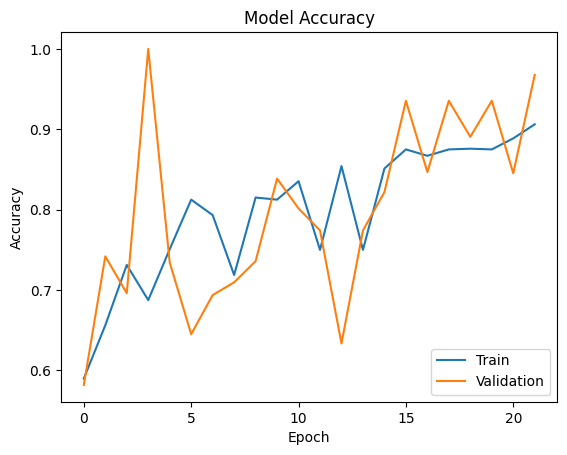

In [60]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'])

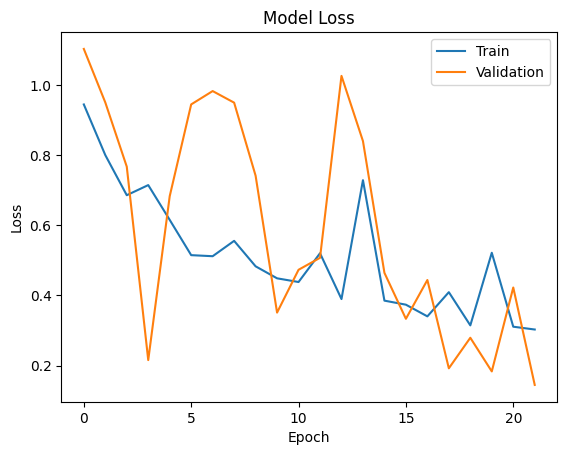

In [61]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'])

In [62]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7571 - loss: 0.6667
Test Loss: 0.4464988112449646
Test Accuracy: 0.844531238079071


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step


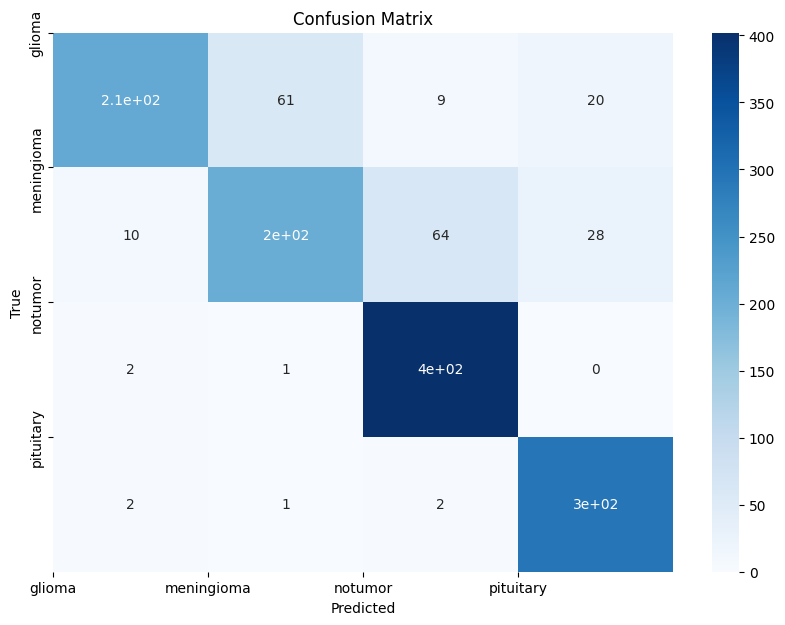

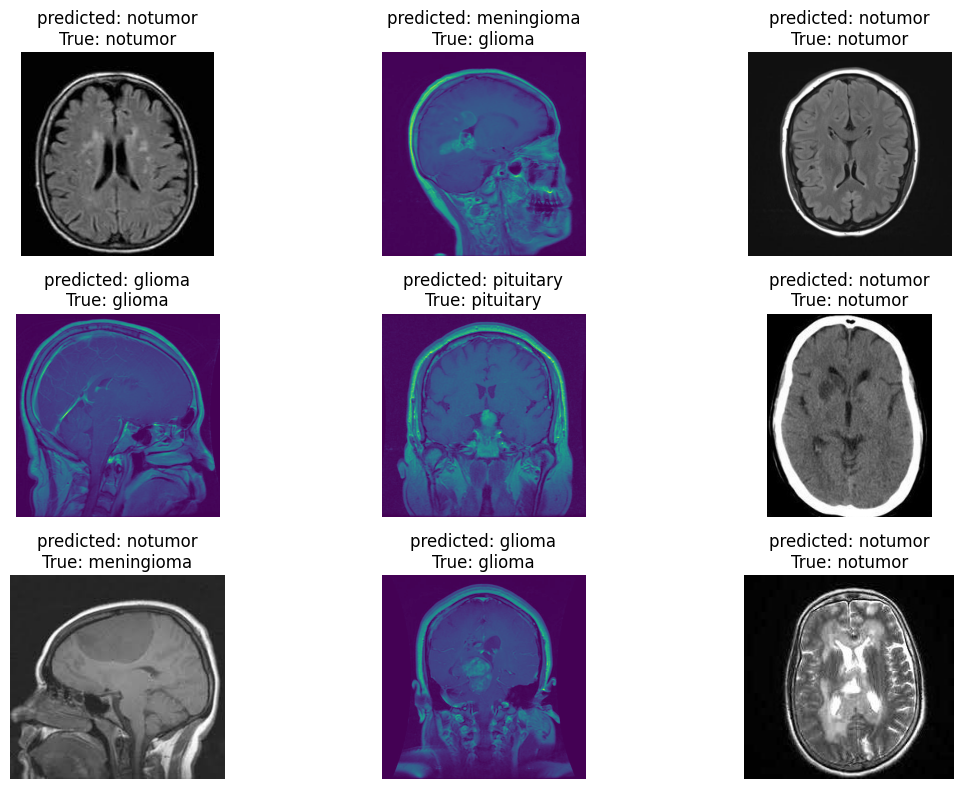

In [63]:
prediction=model.predict(test_generator)
predicted_categories=np.argmax(prediction,axis=1)
true_categories=test_generator.classes

confusion_matrix=tf.math.confusion_matrix(true_categories,predicted_categories)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix,annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)),labels=categories)
plt.yticks(ticks=np.arange(len(categories)),labels=categories)
plt.show()

test_image=test_generator.filenames
sample_indices=np.random.choice(len(test_image),size=9,replace=False)
sample_images=[test_image[i] for i in sample_indices]
sample_predictions=[categories[predicted_categories[i]] for i in sample_indices]
sample_true_label=[categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    img=plt.imread(os.path.join(valid_dir,sample_images[i]))
    plt.imshow(img)
    plt.title(f"predicted: {sample_predictions[i]}\nTrue: {sample_true_label[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Class: glioma
Precision: 0.9375
Recall: 0.7
F1-Score: 0.8015267175572519

Class: meningioma
Precision: 0.7640449438202247
Recall: 0.6666666666666666
F1-Score: 0.7120418848167538

Class: notumor
Precision: 0.8427672955974843
Recall: 0.9925925925925926
F1-Score: 0.9115646258503401

Class: pituitary
Precision: 0.8600583090379009
Recall: 0.9833333333333333
F1-Score: 0.9175738724727839



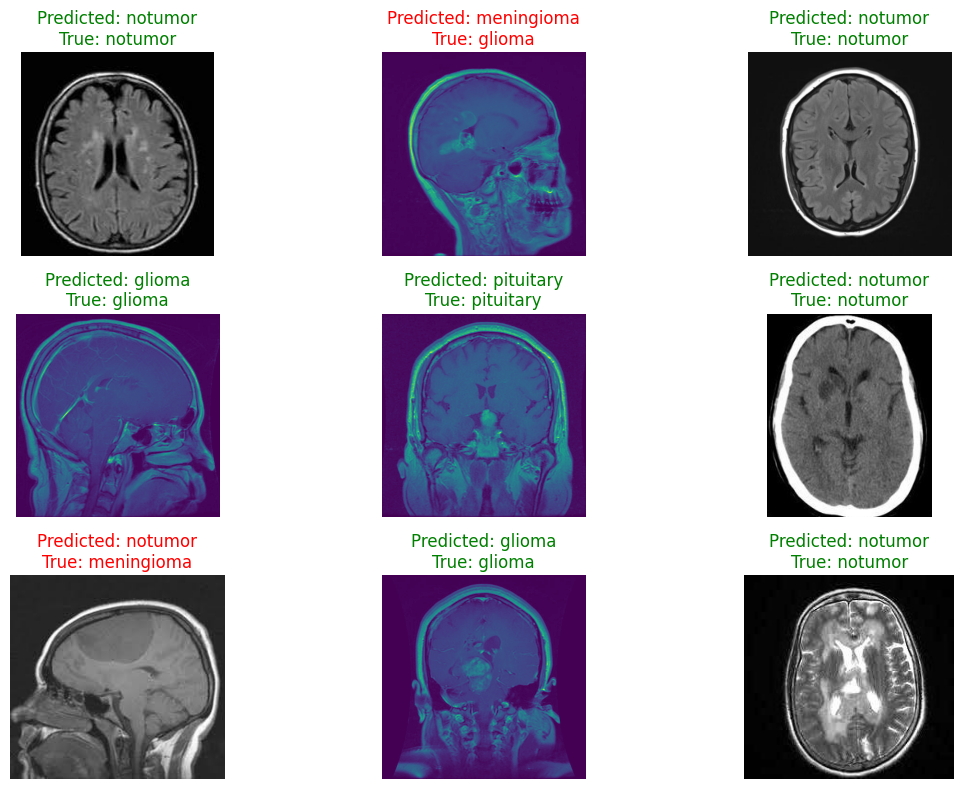

In [64]:
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(valid_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_label[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_label[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_label[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [67]:
import os
os.chdir(r"D:\\project\\brain tumor")
os.getcwd()



'D:\\project\\brain tumor'

In [68]:
model.save("brain_tumor_detection_model_third.keras")